In [1]:
#Installing required packages

#!pip install WordNet
#!pip install torch
#!pip install spacy
#!pip install -U spacy 
#pip install transformers
#!python -m spacy download en_core_web_sm

#importing required libraries

import pandas as pd
import numpy as np 
import nltk
import re
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns


#  Preprocesssing textual data

from nltk import word_tokenize, pos_tag
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 1000)

# additional nltk resources

nltk.download('stopwords')
nltk.download('lemmatizer')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer


# Check Performance
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading lemmatizer: Package 'lemmatizer' not found
[nltk_data]     in index
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sukan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\U

In [2]:
# Importing required data AND Overview
data = pd.read_csv(r"C:\Users\sukan\ipba\csv\comments_for_video_Vq9Gd-2_93A.csv")
data.head(25)

,Comment Number,Reply Number,Like Count,Published At,Text
0,1.0,NaN,0,2023-02-18T17:18:55Z,DISGUSTING AND UNACCEPTABLE
1,2.0,NaN,0,2023-02-05T18:23:15Z,"Beyond creepy! Guess these satanic practices have to be announced for some reason. Like when some weird unimaginable topics are presented in films etc., it gets acceptance through artistic freedom and people tend to dismiss it as factual because it got used for ""entertainment"" before. Actually it is for programming, to distribute these perverted fucked up states of mind !!!"
2,3.0,NaN,0,2023-01-28T14:17:23Z,Where is the parents of this children?? In what delusional hungry for fame world do they live in to allow their children to do such creepy campaign???
3,4.0,NaN,0,2023-01-28T02:12:59Z,This is scary. I bet it wasn't supposed to be this visible but people on the internet picked on it. I feel like they wanted to give subliminal messages. Which is scary. And disgusting. It goes to show how many subliminal things we're really missing on because they are hidden with symbolism but we can't see them with the simple naked eye.
4,5.0,NaN,0,2023-01-21T14:58:43Z,Help those children. The illuminati is real and these kids need real help. They are kidnapped and forced to do things they don't want too
5,6.0,NaN,0,2023-01-20T06:11:36Z,"If they were capable to give this concept a thought, let alone promote it, I don't want to imagine what they're doing once the cameras are turned off. I'm truly sick to my stomach."
6,7.0,NaN,0,2023-01-15T14:37:34Z,"The whole thing is super sus questionable af. I want to know who’s behind it who is the photographer who designed the set in the campaign, etc. who all those people are but it may not necessarily be safe for you to make a video like that would love to see it but I understand why you can’t make it maybe Loves this video😊"
7,8.0,NaN,0,2023-01-13T09:28:27Z,It's a real agenda Gay vs Straight
8,9.0,NaN,0,2023-01-13T09:28:10Z,I'm not going to lie. Y'all tripping
9,10.0,NaN,0,2023-01-12T18:48:03Z,They might be the one kidnapping kids damn I ain’t know it was all that it’s sad now I understand thanks for the video


In [3]:
data.shape

(2546, 5)

In [4]:
# Changing name of 'text' column to 'Comments' column
data.rename(columns = {'Text':'Comments'}, inplace = True)
# removing columns

data = data.drop(['Like Count','Reply Number','Comment Number','Published At'], axis=1)
#data = data[['Comments']][:4000]

In [5]:
data['Comments'] =data['Comments'].astype(str)

In [6]:
data.head()

,Comments
0,DISGUSTING AND UNACCEPTABLE
1,"Beyond creepy! Guess these satanic practices have to be announced for some reason. Like when some weird unimaginable topics are presented in films etc., it gets acceptance through artistic freedom and people tend to dismiss it as factual because it got used for ""entertainment"" before. Actually it is for programming, to distribute these perverted fucked up states of mind !!!"
2,Where is the parents of this children?? In what delusional hungry for fame world do they live in to allow their children to do such creepy campaign???
3,This is scary. I bet it wasn't supposed to be this visible but people on the internet picked on it. I feel like they wanted to give subliminal messages. Which is scary. And disgusting. It goes to show how many subliminal things we're really missing on because they are hidden with symbolism but we can't see them with the simple naked eye.
4,Help those children. The illuminati is real and these kids need real help. They are kidnapped and forced to do things they don't want too


In [7]:
data.dtypes

Comments    object
dtype: object

In [8]:
data.shape

(2546, 1)

In [9]:
#### EDA- cleaning

In [10]:
# URLs removal and extra spaces too

data['Comments'] = data['Comments'].apply(lambda x: re.sub(r'https?\S+ðŸ˜žðŸ˜­ðŸ¤¬', '', x).strip())

In [11]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [12]:
# Commit to Table
data['Comments'] = data['Comments'].apply(remove_punctuations)

In [13]:
# Convert to lower 
data['Comments']=data['Comments'].apply(lambda x: x.lower())

In [14]:
# Get Stopwords
stop = stopwords.words('english')

In [15]:
# Tokenize and Remove Stop Words
data['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0                                                                                                                                                                                                                                                                        [disgusting, unacceptable]
1       [beyond, creepy, guess, satanic, practices, announced, reason, like, weird, unimaginable, topics, presented, films, etc, gets, acceptance, artistic, freedom, people, tend, dismiss, factual, got, used, entertainment, actually, programming, distribute, perverted, fucked, states, mind]
2                                                                                                                                                                                                     [parents, children, delusional, hungry, fame, world, live, allow, children, creepy, campaign]
3                                                      [scary, bet, wasnt, supposed, visible, people, internet, picked, feel

In [16]:
# Join the words back
data['Comments'] = data['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [18]:
# Commit to Table

data['Comments'] = data['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

In [19]:
# Instantiate the TweetTokenizer
tokenizer = TweetTokenizer()

# Define a function to tokenize a tweet
def tokenize_tweet(tweet):
    # Use the TweetTokenizer to tokenize the tweet
    tokens = tokenizer.tokenize(tweet)
    return tokens

# Apply the tokenization function to the 'Comments' column
data['Tokens'] = data['Comments'].apply(tokenize_tweet)

In [20]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [21]:
# Applying the POS tagging function to the 'Comments' column
data['POS_Tagged'] = data['Comments'].apply(pos_tagging)

In [22]:
data.head()

,Comments,Tokens,POS_Tagged
0,disgusting unacceptable,"[disgusting, unacceptable]","[(disgusting, VBG), (unacceptable, JJ)]"
1,beyond creepy guess satanic practices announced reason like weird unimaginable topics presented films etc gets acceptance artistic freedom people tend dismiss factual got used entertainment actually programming distribute perverted fucked states mind,"[beyond, creepy, guess, satanic, practices, announced, reason, like, weird, unimaginable, topics, presented, films, etc, gets, acceptance, artistic, freedom, people, tend, dismiss, factual, got, used, entertainment, actually, programming, distribute, perverted, fucked, states, mind]","[(beyond, IN), (creepy, JJ), (guess, NN), (satanic, JJ), (practices, NNS), (announced, VBD), (reason, NN), (like, IN), (weird, NN), (unimaginable, JJ), (topics, NNS), (presented, VBD), (films, NNS), (etc, FW), (gets, VBZ), (acceptance, RB), (artistic, JJ), (freedom, NN), (people, NNS), (tend, VBP), (dismiss, JJ), (factual, JJ), (got, VBD), (used, JJ), (entertainment, NN), (actually, RB), (programming, VBG), (distribute, NN), (perverted, VBD), (fucked, JJ), (states, NNS), (mind, VBP)]"
2,parents children delusional hungry fame world live allow children creepy campaign,"[parents, children, delusional, hungry, fame, world, live, allow, children, creepy, campaign]","[(parents, NNS), (children, NNS), (delusional, JJ), (hungry, JJ), (fame, NN), (world, NN), (live, VBP), (allow, JJ), (children, NNS), (creepy, VBP), (campaign, NN)]"
3,scary bet wasnt supposed visible people internet picked feel like wanted give subliminal messages scary disgusting goes show many subliminal things really missing hidden symbolism cant see simple naked eye,"[scary, bet, wasnt, supposed, visible, people, internet, picked, feel, like, wanted, give, subliminal, messages, scary, disgusting, goes, show, many, subliminal, things, really, missing, hidden, symbolism, cant, see, simple, naked, eye]","[(scary, JJ), (bet, NN), (wasnt, NN), (supposed, VBD), (visible, JJ), (people, NNS), (internet, VBP), (picked, VBN), (feel, VBP), (like, IN), (wanted, VBD), (give, JJ), (subliminal, JJ), (messages, NNS), (scary, JJ), (disgusting, NN), (goes, VBZ), (show, RB), (many, JJ), (subliminal, JJ), (things, NNS), (really, RB), (missing, VBG), (hidden, JJ), (symbolism, NN), (cant, JJ), (see, NN), (simple, JJ), (naked, JJ), (eye, NN)]"
4,help children illuminati real kids need real help kidnapped forced things dont want,"[help, children, illuminati, real, kids, need, real, help, kidnapped, forced, things, dont, want]","[(help, NN), (children, NNS), (illuminati, JJ), (real, JJ), (kids, NNS), (need, VBP), (real, JJ), (help, NN), (kidnapped, VBD), (forced, VBN), (things, NNS), (dont, RBR), (want, VBP)]"


In [23]:
####Creating models and using it on the dataset

In [24]:
###Analysing sentiments through vader

In [25]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = data['Comments'].apply(sid.polarity_scores)

In [26]:
data["vader_score"] = sentiment_scores.apply(lambda x: x['compound'])

In [27]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score
0,disgusting unacceptable,"[disgusting, unacceptable]","[(disgusting, VBG), (unacceptable, JJ)]",-0.7506
1,beyond creepy guess satanic practices announced reason like weird unimaginable topics presented films etc gets acceptance artistic freedom people tend dismiss factual got used entertainment actually programming distribute perverted fucked states mind,"[beyond, creepy, guess, satanic, practices, announced, reason, like, weird, unimaginable, topics, presented, films, etc, gets, acceptance, artistic, freedom, people, tend, dismiss, factual, got, used, entertainment, actually, programming, distribute, perverted, fucked, states, mind]","[(beyond, IN), (creepy, JJ), (guess, NN), (satanic, JJ), (practices, NNS), (announced, VBD), (reason, NN), (like, IN), (weird, NN), (unimaginable, JJ), (topics, NNS), (presented, VBD), (films, NNS), (etc, FW), (gets, VBZ), (acceptance, RB), (artistic, JJ), (freedom, NN), (people, NNS), (tend, VBP), (dismiss, JJ), (factual, JJ), (got, VBD), (used, JJ), (entertainment, NN), (actually, RB), (programming, VBG), (distribute, NN), (perverted, VBD), (fucked, JJ), (states, NNS), (mind, VBP)]",0.4404
2,parents children delusional hungry fame world live allow children creepy campaign,"[parents, children, delusional, hungry, fame, world, live, allow, children, creepy, campaign]","[(parents, NNS), (children, NNS), (delusional, JJ), (hungry, JJ), (fame, NN), (world, NN), (live, VBP), (allow, JJ), (children, NNS), (creepy, VBP), (campaign, NN)]",0.5859
3,scary bet wasnt supposed visible people internet picked feel like wanted give subliminal messages scary disgusting goes show many subliminal things really missing hidden symbolism cant see simple naked eye,"[scary, bet, wasnt, supposed, visible, people, internet, picked, feel, like, wanted, give, subliminal, messages, scary, disgusting, goes, show, many, subliminal, things, really, missing, hidden, symbolism, cant, see, simple, naked, eye]","[(scary, JJ), (bet, NN), (wasnt, NN), (supposed, VBD), (visible, JJ), (people, NNS), (internet, VBP), (picked, VBN), (feel, VBP), (like, IN), (wanted, VBD), (give, JJ), (subliminal, JJ), (messages, NNS), (scary, JJ), (disgusting, NN), (goes, VBZ), (show, RB), (many, JJ), (subliminal, JJ), (things, NNS), (really, RB), (missing, VBG), (hidden, JJ), (symbolism, NN), (cant, JJ), (see, NN), (simple, JJ), (naked, JJ), (eye, NN)]",-0.8687
4,help children illuminati real kids need real help kidnapped forced things dont want,"[help, children, illuminati, real, kids, need, real, help, kidnapped, forced, things, dont, want]","[(help, NN), (children, NNS), (illuminati, JJ), (real, JJ), (kids, NNS), (need, VBP), (real, JJ), (help, NN), (kidnapped, VBD), (forced, VBN), (things, NNS), (dont, RBR), (want, VBP)]",0.2910


In [28]:
count_total=0
count_pos=0
count_neg=0
#count_neut=0


for i in data["vader_score"]:
    if i >=0:
        count_pos=count_pos+1
    elif i <0:
        count_neg = count_neg +1
    else:
        0
        #count_neut = count_neut +1
        
 

print("positive tweets:",count_pos)
print("negative tweets:",count_neg)

conditions = [
    (data['vader_score'] >=0),
    (data['vader_score'] <0)]
    
choices = [1,0]
data['vader_sentiment'] = np.select(conditions, choices )

positive tweets: 1366
negative tweets: 1180


In [29]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment
0,disgusting unacceptable,"[disgusting, unacceptable]","[(disgusting, VBG), (unacceptable, JJ)]",-0.7506,0
1,beyond creepy guess satanic practices announced reason like weird unimaginable topics presented films etc gets acceptance artistic freedom people tend dismiss factual got used entertainment actually programming distribute perverted fucked states mind,"[beyond, creepy, guess, satanic, practices, announced, reason, like, weird, unimaginable, topics, presented, films, etc, gets, acceptance, artistic, freedom, people, tend, dismiss, factual, got, used, entertainment, actually, programming, distribute, perverted, fucked, states, mind]","[(beyond, IN), (creepy, JJ), (guess, NN), (satanic, JJ), (practices, NNS), (announced, VBD), (reason, NN), (like, IN), (weird, NN), (unimaginable, JJ), (topics, NNS), (presented, VBD), (films, NNS), (etc, FW), (gets, VBZ), (acceptance, RB), (artistic, JJ), (freedom, NN), (people, NNS), (tend, VBP), (dismiss, JJ), (factual, JJ), (got, VBD), (used, JJ), (entertainment, NN), (actually, RB), (programming, VBG), (distribute, NN), (perverted, VBD), (fucked, JJ), (states, NNS), (mind, VBP)]",0.4404,1
2,parents children delusional hungry fame world live allow children creepy campaign,"[parents, children, delusional, hungry, fame, world, live, allow, children, creepy, campaign]","[(parents, NNS), (children, NNS), (delusional, JJ), (hungry, JJ), (fame, NN), (world, NN), (live, VBP), (allow, JJ), (children, NNS), (creepy, VBP), (campaign, NN)]",0.5859,1
3,scary bet wasnt supposed visible people internet picked feel like wanted give subliminal messages scary disgusting goes show many subliminal things really missing hidden symbolism cant see simple naked eye,"[scary, bet, wasnt, supposed, visible, people, internet, picked, feel, like, wanted, give, subliminal, messages, scary, disgusting, goes, show, many, subliminal, things, really, missing, hidden, symbolism, cant, see, simple, naked, eye]","[(scary, JJ), (bet, NN), (wasnt, NN), (supposed, VBD), (visible, JJ), (people, NNS), (internet, VBP), (picked, VBN), (feel, VBP), (like, IN), (wanted, VBD), (give, JJ), (subliminal, JJ), (messages, NNS), (scary, JJ), (disgusting, NN), (goes, VBZ), (show, RB), (many, JJ), (subliminal, JJ), (things, NNS), (really, RB), (missing, VBG), (hidden, JJ), (symbolism, NN), (cant, JJ), (see, NN), (simple, JJ), (naked, JJ), (eye, NN)]",-0.8687,0
4,help children illuminati real kids need real help kidnapped forced things dont want,"[help, children, illuminati, real, kids, need, real, help, kidnapped, forced, things, dont, want]","[(help, NN), (children, NNS), (illuminati, JJ), (real, JJ), (kids, NNS), (need, VBP), (real, JJ), (help, NN), (kidnapped, VBD), (forced, VBN), (things, NNS), (dont, RBR), (want, VBP)]",0.2910,1


In [30]:
for i in data['vader_sentiment']:
    if i == 1:
        lable= ("Positive")
    elif i ==0:
        lable= ("Negative")
    else:
        0

        
(data['vader_sentiment'] ==1),
(data['vader_sentiment'] ==0),

choices = ["Positive","Negative"]

data['vader_labels'] = np.select(conditions, choices )

In [31]:
data.head()

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels
0,disgusting unacceptable,"[disgusting, unacceptable]","[(disgusting, VBG), (unacceptable, JJ)]",-0.7506,0,Negative
1,beyond creepy guess satanic practices announced reason like weird unimaginable topics presented films etc gets acceptance artistic freedom people tend dismiss factual got used entertainment actually programming distribute perverted fucked states mind,"[beyond, creepy, guess, satanic, practices, announced, reason, like, weird, unimaginable, topics, presented, films, etc, gets, acceptance, artistic, freedom, people, tend, dismiss, factual, got, used, entertainment, actually, programming, distribute, perverted, fucked, states, mind]","[(beyond, IN), (creepy, JJ), (guess, NN), (satanic, JJ), (practices, NNS), (announced, VBD), (reason, NN), (like, IN), (weird, NN), (unimaginable, JJ), (topics, NNS), (presented, VBD), (films, NNS), (etc, FW), (gets, VBZ), (acceptance, RB), (artistic, JJ), (freedom, NN), (people, NNS), (tend, VBP), (dismiss, JJ), (factual, JJ), (got, VBD), (used, JJ), (entertainment, NN), (actually, RB), (programming, VBG), (distribute, NN), (perverted, VBD), (fucked, JJ), (states, NNS), (mind, VBP)]",0.4404,1,Positive
2,parents children delusional hungry fame world live allow children creepy campaign,"[parents, children, delusional, hungry, fame, world, live, allow, children, creepy, campaign]","[(parents, NNS), (children, NNS), (delusional, JJ), (hungry, JJ), (fame, NN), (world, NN), (live, VBP), (allow, JJ), (children, NNS), (creepy, VBP), (campaign, NN)]",0.5859,1,Positive
3,scary bet wasnt supposed visible people internet picked feel like wanted give subliminal messages scary disgusting goes show many subliminal things really missing hidden symbolism cant see simple naked eye,"[scary, bet, wasnt, supposed, visible, people, internet, picked, feel, like, wanted, give, subliminal, messages, scary, disgusting, goes, show, many, subliminal, things, really, missing, hidden, symbolism, cant, see, simple, naked, eye]","[(scary, JJ), (bet, NN), (wasnt, NN), (supposed, VBD), (visible, JJ), (people, NNS), (internet, VBP), (picked, VBN), (feel, VBP), (like, IN), (wanted, VBD), (give, JJ), (subliminal, JJ), (messages, NNS), (scary, JJ), (disgusting, NN), (goes, VBZ), (show, RB), (many, JJ), (subliminal, JJ), (things, NNS), (really, RB), (missing, VBG), (hidden, JJ), (symbolism, NN), (cant, JJ), (see, NN), (simple, JJ), (naked, JJ), (eye, NN)]",-0.8687,0,Negative
4,help children illuminati real kids need real help kidnapped forced things dont want,"[help, children, illuminati, real, kids, need, real, help, kidnapped, forced, things, dont, want]","[(help, NN), (children, NNS), (illuminati, JJ), (real, JJ), (kids, NNS), (need, VBP), (real, JJ), (help, NN), (kidnapped, VBD), (forced, VBN), (things, NNS), (dont, RBR), (want, VBP)]",0.2910,1,Positive


<AxesSubplot:xlabel='vader_labels', ylabel='count'>

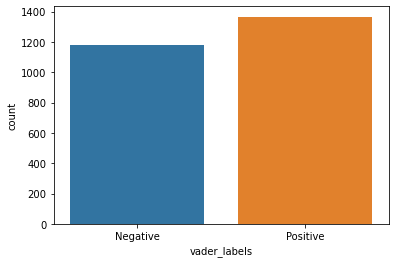

In [32]:
import seaborn as sns

sns.countplot(x='vader_labels', data=data)

Positive Sentiments


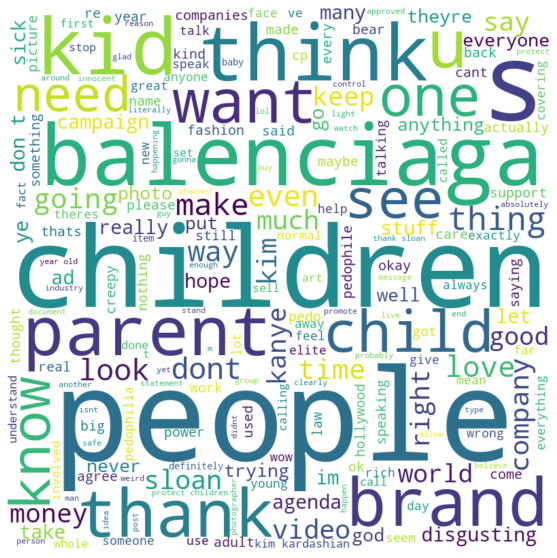

Negative Sentiments


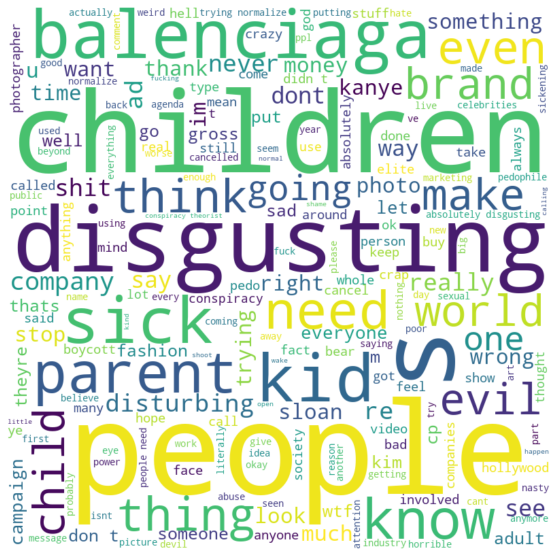

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['vader_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['vader_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [34]:
###Analysing sentiments through pretrained roBERTa

In [35]:
## Importing model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [36]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [37]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
# List of samples
samples = data['Comments'].tolist()

# List to store the scores for each sample
scores_list = []

# Calculate the scores for each sample and store in the scores_list
for sample in samples:
    encoded_text = tokenizer(sample, padding=True, truncation=True, max_length=128, return_tensors='pt')
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    output = model(input_ids=input_ids, attention_mask=attention_mask)
    scores = torch.softmax(output.logits, dim=1)
    scores_dict = {
        'roberta_neg' : scores[0][0].item(),  
        'roberta_pos' : scores[0][1].item()
    }
    scores_list.append(scores_dict)

# Create a pandas dataframe from the scores_list
scores_df = pd.DataFrame(scores_list)

# Concatenate the original data and scores_df dataframes horizontally
data = pd.concat([data, scores_df], axis=1)

# Print the updated dataframe
print(data)

                                                                                                                                                                                                                                                        Comments  \
0                                                                                                                                                                                                                                        disgusting unacceptable   
1     beyond creepy guess satanic practices announced reason like weird unimaginable topics presented films etc gets acceptance artistic freedom people tend dismiss factual got used entertainment actually programming distribute perverted fucked states mind   
2                                                                                                                                                                              parents children delusional hungry fame world

In [38]:
data.head(15)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos
0,disgusting unacceptable,"[disgusting, unacceptable]","[(disgusting, VBG), (unacceptable, JJ)]",-0.7506,0,Negative,0.969032,0.026454
1,beyond creepy guess satanic practices announced reason like weird unimaginable topics presented films etc gets acceptance artistic freedom people tend dismiss factual got used entertainment actually programming distribute perverted fucked states mind,"[beyond, creepy, guess, satanic, practices, announced, reason, like, weird, unimaginable, topics, presented, films, etc, gets, acceptance, artistic, freedom, people, tend, dismiss, factual, got, used, entertainment, actually, programming, distribute, perverted, fucked, states, mind]","[(beyond, IN), (creepy, JJ), (guess, NN), (satanic, JJ), (practices, NNS), (announced, VBD), (reason, NN), (like, IN), (weird, NN), (unimaginable, JJ), (topics, NNS), (presented, VBD), (films, NNS), (etc, FW), (gets, VBZ), (acceptance, RB), (artistic, JJ), (freedom, NN), (people, NNS), (tend, VBP), (dismiss, JJ), (factual, JJ), (got, VBD), (used, JJ), (entertainment, NN), (actually, RB), (programming, VBG), (distribute, NN), (perverted, VBD), (fucked, JJ), (states, NNS), (mind, VBP)]",0.4404,1,Positive,0.800602,0.187502
2,parents children delusional hungry fame world live allow children creepy campaign,"[parents, children, delusional, hungry, fame, world, live, allow, children, creepy, campaign]","[(parents, NNS), (children, NNS), (delusional, JJ), (hungry, JJ), (fame, NN), (world, NN), (live, VBP), (allow, JJ), (children, NNS), (creepy, VBP), (campaign, NN)]",0.5859,1,Positive,0.913639,0.082389
3,scary bet wasnt supposed visible people internet picked feel like wanted give subliminal messages scary disgusting goes show many subliminal things really missing hidden symbolism cant see simple naked eye,"[scary, bet, wasnt, supposed, visible, people, internet, picked, feel, like, wanted, give, subliminal, messages, scary, disgusting, goes, show, many, subliminal, things, really, missing, hidden, symbolism, cant, see, simple, naked, eye]","[(scary, JJ), (bet, NN), (wasnt, NN), (supposed, VBD), (visible, JJ), (people, NNS), (internet, VBP), (picked, VBN), (feel, VBP), (like, IN), (wanted, VBD), (give, JJ), (subliminal, JJ), (messages, NNS), (scary, JJ), (disgusting, NN), (goes, VBZ), (show, RB), (many, JJ), (subliminal, JJ), (things, NNS), (really, RB), (missing, VBG), (hidden, JJ), (symbolism, NN), (cant, JJ), (see, NN), (simple, JJ), (naked, JJ), (eye, NN)]",-0.8687,0,Negative,0.926791,0.069861
4,help children illuminati real kids need real help kidnapped forced things dont want,"[help, children, illuminati, real, kids, need, real, help, kidnapped, forced, things, dont, want]","[(help, NN), (children, NNS), (illuminati, JJ), (real, JJ), (kids, NNS), (need, VBP), (real, JJ), (help, NN), (kidnapped, VBD), (forced, VBN), (things, NNS), (dont, RBR), (want, VBP)]",0.2910,1,Positive,0.707452,0.277319
5,capable give concept thought let alone promote dont want imagine theyre cameras turned im truly sick stomach,"[capable, give, concept, thought, let, alone, promote, dont, want, imagine, theyre, cameras, turned, im, truly, sick, stomach]","[(capable, JJ), (give, JJ), (concept, NN), (thought, VBD), (let, VB), (alone, JJ), (promote, VB), (dont, JJ), (want, JJ), (imagine, NN), (theyre, NN), (cameras, NNS), (turned, VBD), (im, JJ), (truly, RB), (sick, JJ), (stomach, NN)]",0.3773,1,Positive,0.883721,0.108777
6,whole thing super sus questionable af want know who’s behind photographer designed set campaign etc people may necessarily safe make video like would love see understand can’t make maybe loves video😊,"[whole, thing, super, sus, questionable, af, want, know, who, ’, s, behind, photographer, designed, set, campaign, etc, people, may, necessarily, safe, make, video, like, would, love, see, understand, can, ’, t, make, maybe, loves, video, 😊]","[(whole, JJ), (thing, NN), (super, JJ), (sus, 

In [39]:
def get_label(score):
    if score > 0.5:
        return "Positive"
    else:
        return "Negative"

# Convert the scores to labels for each model
data["roberta_labels"] = data["roberta_pos"].apply(get_label)

In [40]:
data.head(5)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos,roberta_labels
0,disgusting unacceptable,"[disgusting, unacceptable]","[(disgusting, VBG), (unacceptable, JJ)]",-0.7506,0,Negative,0.969032,0.026454,Negative
1,beyond creepy guess satanic practices announced reason like weird unimaginable topics presented films etc gets acceptance artistic freedom people tend dismiss factual got used entertainment actually programming distribute perverted fucked states mind,"[beyond, creepy, guess, satanic, practices, announced, reason, like, weird, unimaginable, topics, presented, films, etc, gets, acceptance, artistic, freedom, people, tend, dismiss, factual, got, used, entertainment, actually, programming, distribute, perverted, fucked, states, mind]","[(beyond, IN), (creepy, JJ), (guess, NN), (satanic, JJ), (practices, NNS), (announced, VBD), (reason, NN), (like, IN), (weird, NN), (unimaginable, JJ), (topics, NNS), (presented, VBD), (films, NNS), (etc, FW), (gets, VBZ), (acceptance, RB), (artistic, JJ), (freedom, NN), (people, NNS), (tend, VBP), (dismiss, JJ), (factual, JJ), (got, VBD), (used, JJ), (entertainment, NN), (actually, RB), (programming, VBG), (distribute, NN), (perverted, VBD), (fucked, JJ), (states, NNS), (mind, VBP)]",0.4404,1,Positive,0.800602,0.187502,Negative
2,parents children delusional hungry fame world live allow children creepy campaign,"[parents, children, delusional, hungry, fame, world, live, allow, children, creepy, campaign]","[(parents, NNS), (children, NNS), (delusional, JJ), (hungry, JJ), (fame, NN), (world, NN), (live, VBP), (allow, JJ), (children, NNS), (creepy, VBP), (campaign, NN)]",0.5859,1,Positive,0.913639,0.082389,Negative
3,scary bet wasnt supposed visible people internet picked feel like wanted give subliminal messages scary disgusting goes show many subliminal things really missing hidden symbolism cant see simple naked eye,"[scary, bet, wasnt, supposed, visible, people, internet, picked, feel, like, wanted, give, subliminal, messages, scary, disgusting, goes, show, many, subliminal, things, really, missing, hidden, symbolism, cant, see, simple, naked, eye]","[(scary, JJ), (bet, NN), (wasnt, NN), (supposed, VBD), (visible, JJ), (people, NNS), (internet, VBP), (picked, VBN), (feel, VBP), (like, IN), (wanted, VBD), (give, JJ), (subliminal, JJ), (messages, NNS), (scary, JJ), (disgusting, NN), (goes, VBZ), (show, RB), (many, JJ), (subliminal, JJ), (things, NNS), (really, RB), (missing, VBG), (hidden, JJ), (symbolism, NN), (cant, JJ), (see, NN), (simple, JJ), (naked, JJ), (eye, NN)]",-0.8687,0,Negative,0.926791,0.069861,Negative
4,help children illuminati real kids need real help kidnapped forced things dont want,"[help, children, illuminati, real, kids, need, real, help, kidnapped, forced, things, dont, want]","[(help, NN), (children, NNS), (illuminati, JJ), (real, JJ), (kids, NNS), (need, VBP), (real, JJ), (help, NN), (kidnapped, VBD), (forced, VBN), (things, NNS), (dont, RBR), (want, VBP)]",0.2910,1,Positive,0.707452,0.277319,Negative


<AxesSubplot:xlabel='roberta_labels', ylabel='count'>

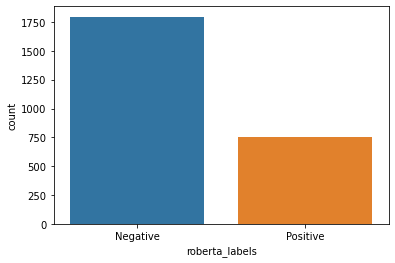

In [41]:
import seaborn as sns

sns.countplot(x='roberta_labels', data=data)

Positive Sentiments


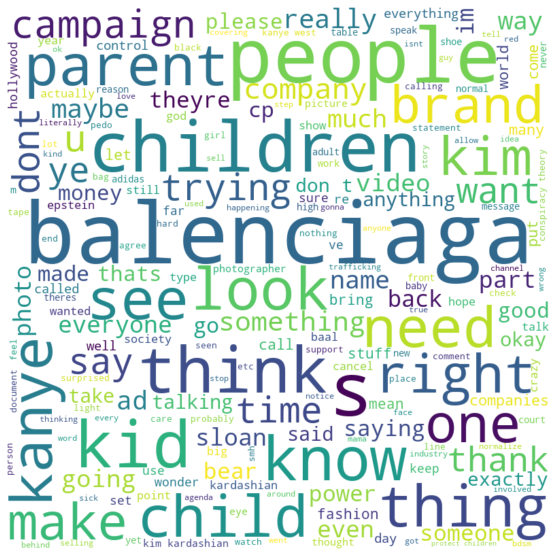

Negative Sentiments


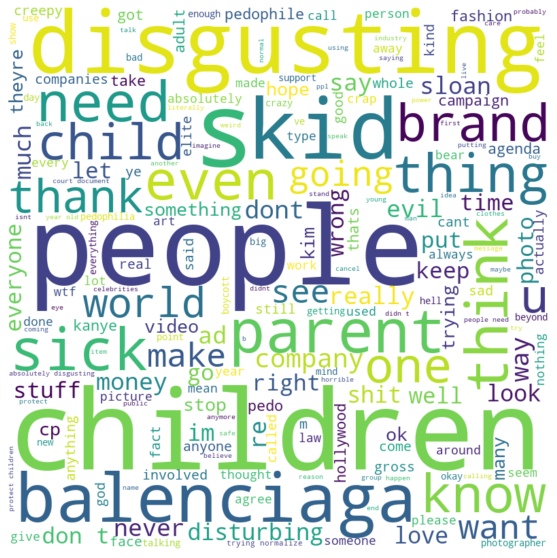

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['roberta_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['roberta_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [43]:
### Analysing sentiments through huggingface transformers

In [44]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [45]:
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('sentencizer')

#Export sample comments from all the datasets
text = data['Comments'].tolist()[:100]
sentences = []
for doc in nlp.pipe(text):
    sentences.extend([sent.text for sent in doc.sents])

print(sentences)

['disgusting unacceptable', 'beyond creepy guess satanic practices announced reason like weird unimaginable topics presented films etc gets acceptance artistic freedom people tend dismiss factual got used entertainment actually programming distribute perverted fucked states mind', 'parents children delusional hungry fame world live allow children creepy campaign', 'scary bet wasnt supposed visible people internet picked feel like wanted give subliminal messages scary disgusting goes show many subliminal things really missing hidden symbolism cant see simple naked eye', 'help children illuminati real kids need real help kidnapped forced things dont want', 'capable give concept thought let alone promote dont want imagine theyre cameras turned im truly sick stomach', 'whole thing super sus questionable af want know who’s behind photographer designed set campaign etc people may necessarily safe make video like would love see understand can’t make maybe loves video😊', 'real agenda gay vs st

In [46]:
sent_pipeline(data['Comments'].tolist()[:100])

[{'label': 'NEGATIVE', 'score': 0.9997456669807434},
 {'label': 'NEGATIVE', 'score': 0.9879420399665833},
 {'label': 'NEGATIVE', 'score': 0.9910022616386414},
 {'label': 'NEGATIVE', 'score': 0.9989575147628784},
 {'label': 'NEGATIVE', 'score': 0.9881254434585571},
 {'label': 'NEGATIVE', 'score': 0.9963990449905396},
 {'label': 'NEGATIVE', 'score': 0.9971689581871033},
 {'label': 'POSITIVE', 'score': 0.9633289575576782},
 {'label': 'NEGATIVE', 'score': 0.9992641806602478},
 {'label': 'NEGATIVE', 'score': 0.9828991889953613},
 {'label': 'NEGATIVE', 'score': 0.9948341846466064},
 {'label': 'POSITIVE', 'score': 0.9998694658279419},
 {'label': 'NEGATIVE', 'score': 0.8734908699989319},
 {'label': 'NEGATIVE', 'score': 0.9993533492088318},
 {'label': 'NEGATIVE', 'score': 0.9984211921691895},
 {'label': 'NEGATIVE', 'score': 0.6970565915107727},
 {'label': 'NEGATIVE', 'score': 0.9747542142868042},
 {'label': 'NEGATIVE', 'score': 0.6332423090934753},
 {'label': 'NEGATIVE', 'score': 0.697056591510

In [47]:
sentiments = sent_pipeline(data['Comments'].tolist())
data['transformer_score'] = [s['score'] for s in sentiments]
data['transformer_labels'] = [s['label'] for s in sentiments]

In [48]:
data['transformer_labels']=data['transformer_labels'].str.title()

In [49]:
data.head(15)

,Comments,Tokens,POS_Tagged,vader_score,vader_sentiment,vader_labels,roberta_neg,roberta_pos,roberta_labels,transformer_score,transformer_labels
0,disgusting unacceptable,"[disgusting, unacceptable]","[(disgusting, VBG), (unacceptable, JJ)]",-0.7506,0,Negative,0.969032,0.026454,Negative,0.999746,Negative
1,beyond creepy guess satanic practices announced reason like weird unimaginable topics presented films etc gets acceptance artistic freedom people tend dismiss factual got used entertainment actually programming distribute perverted fucked states mind,"[beyond, creepy, guess, satanic, practices, announced, reason, like, weird, unimaginable, topics, presented, films, etc, gets, acceptance, artistic, freedom, people, tend, dismiss, factual, got, used, entertainment, actually, programming, distribute, perverted, fucked, states, mind]","[(beyond, IN), (creepy, JJ), (guess, NN), (satanic, JJ), (practices, NNS), (announced, VBD), (reason, NN), (like, IN), (weird, NN), (unimaginable, JJ), (topics, NNS), (presented, VBD), (films, NNS), (etc, FW), (gets, VBZ), (acceptance, RB), (artistic, JJ), (freedom, NN), (people, NNS), (tend, VBP), (dismiss, JJ), (factual, JJ), (got, VBD), (used, JJ), (entertainment, NN), (actually, RB), (programming, VBG), (distribute, NN), (perverted, VBD), (fucked, JJ), (states, NNS), (mind, VBP)]",0.4404,1,Positive,0.800602,0.187502,Negative,0.987942,Negative
2,parents children delusional hungry fame world live allow children creepy campaign,"[parents, children, delusional, hungry, fame, world, live, allow, children, creepy, campaign]","[(parents, NNS), (children, NNS), (delusional, JJ), (hungry, JJ), (fame, NN), (world, NN), (live, VBP), (allow, JJ), (children, NNS), (creepy, VBP), (campaign, NN)]",0.5859,1,Positive,0.913639,0.082389,Negative,0.991002,Negative
3,scary bet wasnt supposed visible people internet picked feel like wanted give subliminal messages scary disgusting goes show many subliminal things really missing hidden symbolism cant see simple naked eye,"[scary, bet, wasnt, supposed, visible, people, internet, picked, feel, like, wanted, give, subliminal, messages, scary, disgusting, goes, show, many, subliminal, things, really, missing, hidden, symbolism, cant, see, simple, naked, eye]","[(scary, JJ), (bet, NN), (wasnt, NN), (supposed, VBD), (visible, JJ), (people, NNS), (internet, VBP), (picked, VBN), (feel, VBP), (like, IN), (wanted, VBD), (give, JJ), (subliminal, JJ), (messages, NNS), (scary, JJ), (disgusting, NN), (goes, VBZ), (show, RB), (many, JJ), (subliminal, JJ), (things, NNS), (really, RB), (missing, VBG), (hidden, JJ), (symbolism, NN), (cant, JJ), (see, NN), (simple, JJ), (naked, JJ), (eye, NN)]",-0.8687,0,Negative,0.926791,0.069861,Negative,0.998958,Negative
4,help children illuminati real kids need real help kidnapped forced things dont want,"[help, children, illuminati, real, kids, need, real, help, kidnapped, forced, things, dont, want]","[(help, NN), (children, NNS), (illuminati, JJ), (real, JJ), (kids, NNS), (need, VBP), (real, JJ), (help, NN), (kidnapped, VBD), (forced, VBN), (things, NNS), (dont, RBR), (want, VBP)]",0.2910,1,Positive,0.707452,0.277319,Negative,0.988125,Negative
5,capable give concept thought let alone promote dont want imagine theyre cameras turned im truly sick stomach,"[capable, give, concept, thought, let, alone, promote, dont, want, imagine, theyre, cameras, turned, im, truly, sick, stomach]","[(capable, JJ), (give, JJ), (concept, NN), (thought, VBD), (let, VB), (alone, JJ), (promote, VB), (dont, JJ), (want, JJ), (imagine, NN), (theyre, NN), (cameras, NNS), (turned, VBD), (im, JJ), (truly, RB), (sick, JJ), (stomach, NN)]",0.3773,1,Positive,0.883721,0.108777,Negative,0.996399,Negative
6,whole thing super sus questionable af want know who’s behind photographer designed set campaign etc people may necessarily safe make video like would love see understand can’t make maybe loves video😊,"[whole, thing, super, sus, questionable, af, want, know, who, ’, s, behind, 

<AxesSubplot:xlabel='transformer_labels', ylabel='count'>

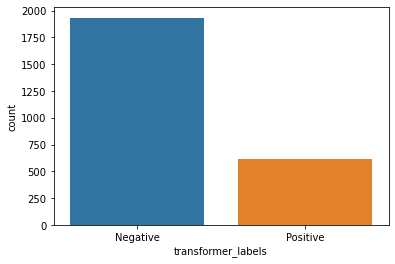

In [50]:
import seaborn as sns

sns.countplot(x='transformer_labels', data=data)

Positive Sentiments


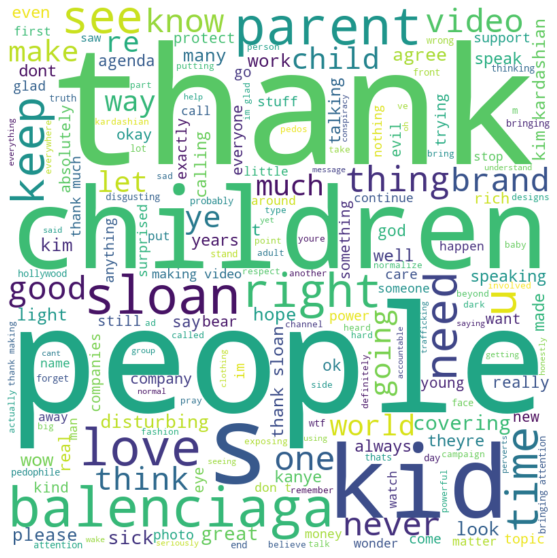

Negative Sentiments


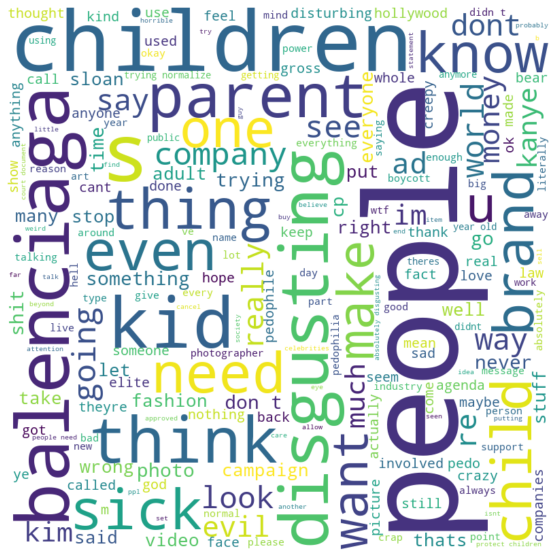

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_tweets = ' '.join(data[data['transformer_labels'] == 'Positive']['Comments'].tolist())

negative_tweets = ' '.join(data[data['transformer_labels'] == 'Negative']['Comments'].tolist())

print("Positive Sentiments")
generate_wordcloud(positive_tweets)
print("Negative Sentiments")
generate_wordcloud(negative_tweets)

In [52]:
##### creating data frame of labels of the models used.

In [53]:
labels = data[['Comments','vader_labels','roberta_labels','transformer_labels']]

In [54]:
labels.head(10)

,Comments,vader_labels,roberta_labels,transformer_labels
0,disgusting unacceptable,Negative,Negative,Negative
1,beyond creepy guess satanic practices announced reason like weird unimaginable topics presented films etc gets acceptance artistic freedom people tend dismiss factual got used entertainment actually programming distribute perverted fucked states mind,Positive,Negative,Negative
2,parents children delusional hungry fame world live allow children creepy campaign,Positive,Negative,Negative
3,scary bet wasnt supposed visible people internet picked feel like wanted give subliminal messages scary disgusting goes show many subliminal things really missing hidden symbolism cant see simple naked eye,Negative,Negative,Negative
4,help children illuminati real kids need real help kidnapped forced things dont want,Positive,Negative,Negative
5,capable give concept thought let alone promote dont want imagine theyre cameras turned im truly sick stomach,Positive,Negative,Negative
6,whole thing super sus questionable af want know who’s behind photographer designed set campaign etc people may necessarily safe make video like would love see understand can’t make maybe loves video😊,Positive,Negative,Negative
7,real agenda gay vs straight,Positive,Positive,Positive
8,im going lie yall tripping,Positive,Negative,Negative
9,might one kidnapping kids damn ain’t know it’s sad understand thanks video,Negative,Negative,Negative


In [55]:
####Checking accuracy and F1 Score of the models used.

In [56]:
from sklearn.metrics import accuracy_score, f1_score


# Get the Vader labels
y_true = data['transformer_labels']
# Get the labels from approach 1
y_pred_approach_1 = data['vader_labels']
y_pred_approach_2 = data['roberta_labels']
# Calculate the accuracy score for each approach
acc_approach_1 = accuracy_score(y_true, y_pred_approach_1)
acc_approach_2 = accuracy_score(y_true, y_pred_approach_2)
# Calculate the F1 score for each approach
f1_approach_1 = f1_score(y_true, y_pred_approach_1, average='weighted')
f1_approach_2 = f1_score(y_true, y_pred_approach_2, average='weighted')
# Print the results
 
print("Accuracy for vader_labels : {:.4f}".format(acc_approach_1))
print("F1 score for vader_labels: {:.4f}".format(f1_approach_1))
print("Accuracy for roberta_labels : {:.4f}".format(acc_approach_2))
print("F1 score for roberta_labels: {:.4f}".format(f1_approach_2))

Accuracy for vader_labels : 0.6418
F1 score for vader_labels: 0.6665
Accuracy for roberta_labels : 0.7011
F1 score for roberta_labels: 0.7106


In [57]:
####comparison of the results of the scores of models through plots

In [58]:
import matplotlib.pyplot as plt
vader_f1 = [f1_approach_1,]
roberta_f1 = [f1_approach_2]
vader_acc = [acc_approach_1]
roberta_acc = [acc_approach_2]

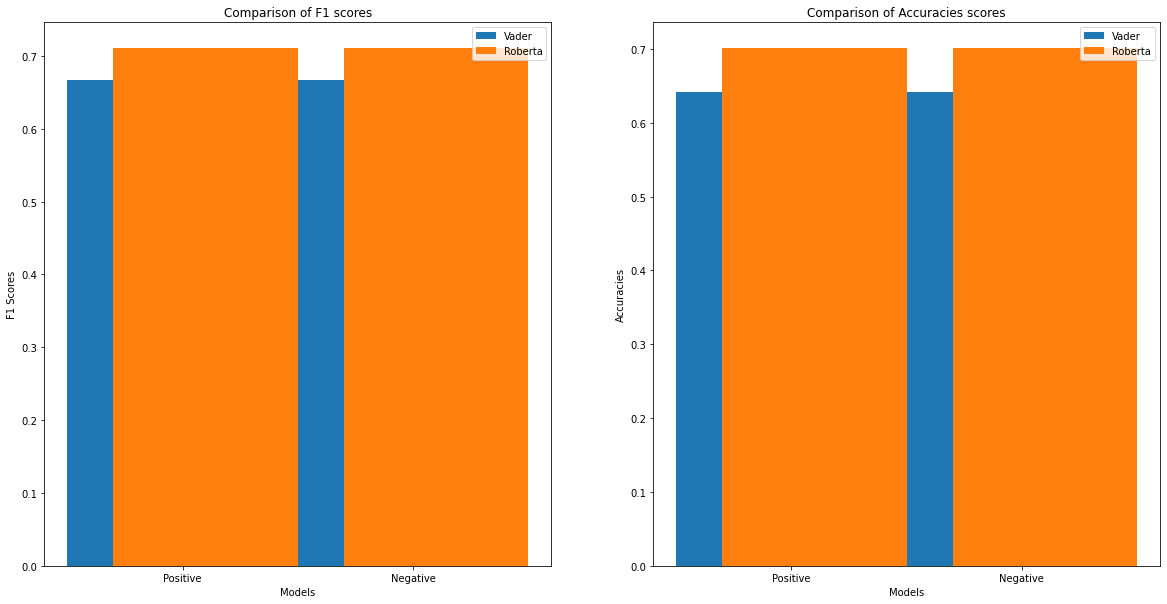

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].bar([0, 1], vader_f1, label='Vader')
axs[0].bar([0.2, 1.2], roberta_f1, label='Roberta')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('F1 Scores')
axs[0].set_xticks([0.1, 1.1])
axs[0].set_xticklabels(['Positive', 'Negative'])
axs[0].set_title('Comparison of F1 scores')
axs[0].legend()
# Plot accuracies in the second subplot
axs[1].bar([0, 1], vader_acc, label='Vader')
axs[1].bar([0.2, 1.2], roberta_acc, label='Roberta')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Accuracies')
axs[1].set_xticks([0.1, 1.1])
axs[1].set_xticklabels(['Positive', 'Negative'])
axs[1].set_title('Comparison of Accuracies scores')
axs[1].legend()

In [60]:
###Conclusion
###Based on the F1 scores, the Roberta model has the highest F1 score of 0.7106,outperforming  Vader model's f1 score of 0.6665 , so to conclude ,Roberta model predicted sentiments much accurately than Vader model for a dataset of this type and size.


